In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, exp

In [2]:
image = cv2.imread("Fig0939.tif", 0)

In [3]:
original = np.fft.fft2(image)

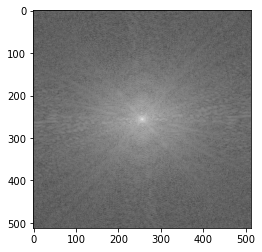

In [4]:
centeredSpectrum = np.fft.fftshift(original)
plt.imshow(np.log(1+np.abs(centeredSpectrum)), "gray")

In [5]:
center = int((len(centeredSpectrum+1))/2)
center

256

In [6]:
print("Valor do coeficiente F(0,0):", centeredSpectrum[center][center])

Valor do coeficiente F(0,0): (21082229+0j)


In [7]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

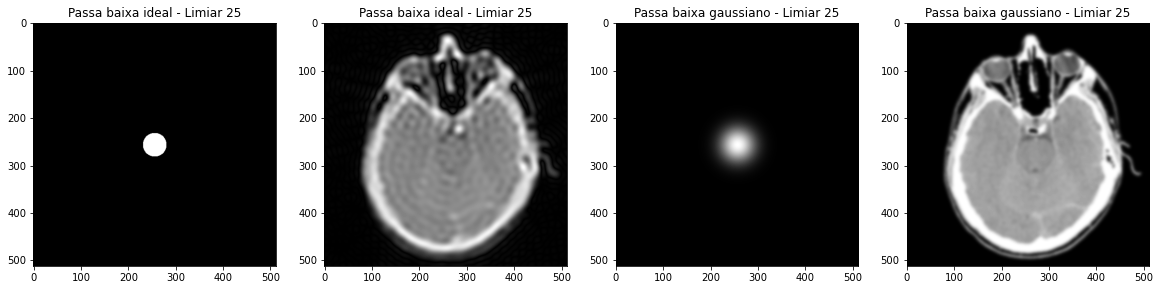

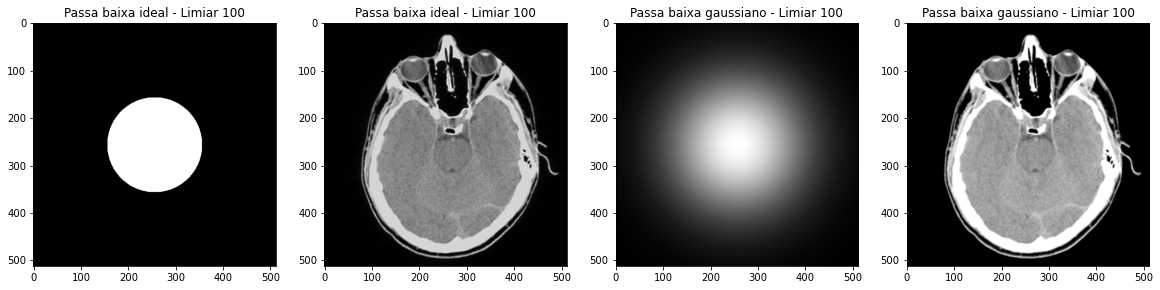

In [8]:
lowPassIdealFilter1 = idealFilterLP(25,image.shape)
lowPassIdealCenter1 = centeredSpectrum * lowPassIdealFilter1
lowPassIdeal1 = np.fft.ifftshift(lowPassIdealCenter1)
inverseLowPassIdeal1 = np.fft.ifft2(lowPassIdeal1)

lowPassGaussianFilter1 = gaussianLP(25,image.shape)
lowPassGaussianCenter1 = centeredSpectrum * lowPassGaussianFilter1
lowPassGaussian1 = np.fft.ifftshift(lowPassGaussianCenter1)
inverseLowPassGaussian1 = np.fft.ifft2(lowPassGaussian1)

lowPassIdealFilter2 = idealFilterLP(100,image.shape)
lowPassIdealCenter2 = centeredSpectrum * lowPassIdealFilter2
lowPassIdeal2 = np.fft.ifftshift(lowPassIdealCenter2)
inverseLowPassIdeal2 = np.fft.ifft2(lowPassIdeal2)

lowPassGaussianFilter2 = gaussianLP(100,image.shape)
lowPassGaussianCenter2 = centeredSpectrum * lowPassGaussianFilter2
lowPassGaussian2 = np.fft.ifftshift(lowPassGaussianCenter2)
inverseLowPassGaussian2 = np.fft.ifft2(lowPassGaussian2)

plt.figure(figsize=(20,20))
plt.subplot(141)
plt.title("Passa baixa ideal - Limiar 25")
plt.imshow(lowPassIdealFilter1, cmap="gray")
plt.subplot(142)
plt.title("Passa baixa ideal - Limiar 25")
plt.imshow(np.abs(inverseLowPassIdeal1), "gray")
plt.subplot(143)
plt.title("Passa baixa gaussiano - Limiar 25")
plt.imshow(lowPassGaussianFilter1, cmap="gray")
plt.subplot(144)
plt.title("Passa baixa gaussiano - Limiar 25")
plt.imshow(np.abs(inverseLowPassGaussian1), "gray")
plt.show()

plt.figure(figsize=(20,20))
plt.subplot(141)
plt.title("Passa baixa ideal - Limiar 100")
plt.imshow(lowPassIdealFilter2, cmap="gray")
plt.subplot(142)
plt.title("Passa baixa ideal - Limiar 100")
plt.imshow(np.abs(inverseLowPassIdeal2), "gray")
plt.subplot(143)
plt.title("Passa baixa gaussiano - Limiar 100")
plt.imshow(lowPassGaussianFilter2, cmap="gray")
plt.subplot(144)
plt.title("Passa baixa gaussiano - Limiar 100")
plt.imshow(np.abs(inverseLowPassGaussian2), "gray")
plt.show()

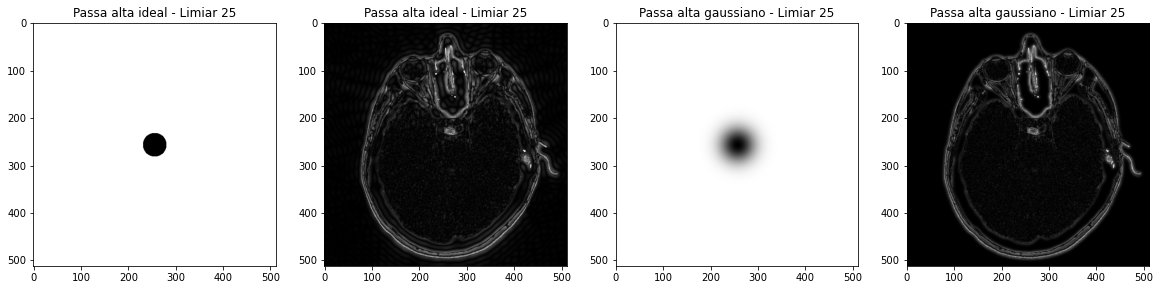

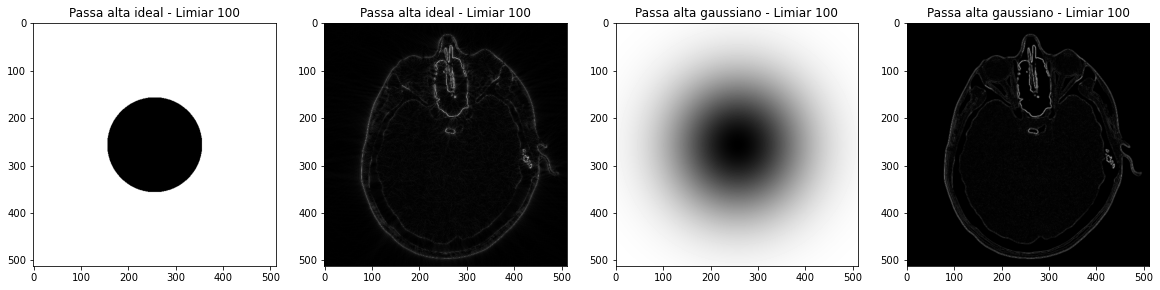

In [9]:
highPassIdealFilter1 = idealFilterHP(25,image.shape)
highPassIdealCenter1 = centeredSpectrum * highPassIdealFilter1
highPassIdeal1 = np.fft.ifftshift(highPassIdealCenter1)
inverseHighPassIdeal1 = np.fft.ifft2(highPassIdeal1)

highPassGaussianFilter1 = gaussianHP(25,image.shape)
highPassGaussianCenter1 = centeredSpectrum * highPassGaussianFilter1
highPassGaussian1 = np.fft.ifftshift(highPassGaussianCenter1)
inverseHighPassGaussian1 = np.fft.ifft2(highPassGaussian1)

highPassIdealFilter2 = idealFilterHP(100,image.shape)
highPassIdealCenter2 = centeredSpectrum * highPassIdealFilter2
highPassIdeal2 = np.fft.ifftshift(highPassIdealCenter2)
inverseHighPassIdeal2 = np.fft.ifft2(highPassIdeal2)

highPassGaussianFilter2 = gaussianHP(100,image.shape)
highPassGaussianCenter2 = centeredSpectrum * highPassGaussianFilter2
highPassGaussian2 = np.fft.ifftshift(highPassGaussianCenter2)
inverseHighPassGaussian2 = np.fft.ifft2(highPassGaussian2)

plt.figure(figsize=(20,20))
plt.subplot(141)
plt.title("Passa alta ideal - Limiar 25")
plt.imshow(highPassIdealFilter1, cmap="gray")
plt.subplot(142)
plt.title("Passa alta ideal - Limiar 25")
plt.imshow(np.abs(inverseHighPassIdeal1), "gray")
plt.subplot(143)
plt.title("Passa alta gaussiano - Limiar 25")
plt.imshow(highPassGaussianFilter1, cmap="gray")
plt.subplot(144)
plt.title("Passa alta gaussiano - Limiar 25")
plt.imshow(np.abs(inverseHighPassGaussian1), "gray")
plt.show()

plt.figure(figsize=(20,20))
plt.subplot(141)
plt.title("Passa alta ideal - Limiar 100")
plt.imshow(highPassIdealFilter2, cmap="gray")
plt.subplot(142)
plt.title("Passa alta ideal - Limiar 100")
plt.imshow(np.abs(inverseHighPassIdeal2), "gray")
plt.subplot(143)
plt.title("Passa alta gaussiano - Limiar 100")
plt.imshow(highPassGaussianFilter2, cmap="gray")
plt.subplot(144)
plt.title("Passa alta gaussiano - Limiar 100")
plt.imshow(np.abs(inverseHighPassGaussian2), "gray")
plt.show()